## Yelp Project Part II: Feature Engineering - Feature Selection

In [1]:
#################################################################################################
##########################  Loading Basic Packages  ###############################################################
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
#######################################################################################

In [3]:
### Before Feature Engineering, the model's performance is extremely low

In [4]:
# !pip install mlxtend

In [2]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score


In [3]:
df = pd.read_csv('Business_final.csv')

In [4]:
business_id = df['business_id']

In [5]:
features = df.columns
X = df.drop(['business_id', 'stars'], axis = 1).values
y = df['stars'].values

In [6]:
# split datasets as training set and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [7]:
X_train.shape

(38819, 98)

In [10]:
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score

names = [
         "Perceptron",
         "LogisticRegression",
         "Linear SVM", 
         "Decision Tree", 
         "Random Forest", 
#          "RBF SVM",          
         "Neural Net", 
         "Naive Bayes",  
         "Nearest Neighbors",
         "XGBoost"
            ] 

classifiers = [ 
    Perceptron(),
    LogisticRegression(),
    LinearSVC(C=1, dual=False),
    DecisionTreeClassifier(max_depth=15),
    RandomForestClassifier(max_depth=15, min_samples_leaf=1, max_features=0.3, 
                             min_samples_split=10, n_estimators=200, oob_score=False),
#     SVC(kernel='rbf',gamma=2, C=1),
    MLPClassifier(hidden_layer_sizes=(150,150), alpha=1, batch_size=128),
    GaussianNB(),
    KNeighborsClassifier(5),
    XGBClassifier(max_depth= 1, eta=0.001, gamma=0, n_estimators=1000, n_jobs=-1, subsample=0.1)
                 ]


from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.decomposition import PCA

for name, clf in zip(names, classifiers):
    pipe = Pipeline( [ ('scl', StandardScaler()),
#                    ('lda', lda),
                   ('clf', clf)])
    pipe.fit(X_train, y_train)
#     scores = cross_val_score(pipe, X_train, y_train, cv=3, n_jobs=-1)
#     print("Algo: {0:<20s} and Score: {1:0.4f}".format(name, np.mean(scores)))

    #    score = pipe.score(X_test, y_test)

#    clf.fit(X_train, y_train)
    score = pipe.score(X_test, y_test)
    print("Algo: {0:<20s} and Score: {1:0.4f}".format(name, score))

Algo: Perceptron           and Score: 0.5555
Algo: LogisticRegression   and Score: 0.6602
Algo: Linear SVM           and Score: 0.6598
Algo: Decision Tree        and Score: 0.6376
Algo: Random Forest        and Score: 0.6885
Algo: Neural Net           and Score: 0.6701
Algo: Naive Bayes          and Score: 0.6273
Algo: Nearest Neighbors    and Score: 0.6072
Algo: XGBoost              and Score: 0.6798


In [1]:
# the accuracy is extremely low

In [12]:
from sklearn.metrics import roc_curve
pipe = Pipeline( [ ('scl', StandardScaler()),
                   ('clf', RandomForestClassifier(max_depth=15, min_samples_leaf=1, max_features=0.3, 
                             min_samples_split=10, n_estimators=200, oob_score=False))])
pipe.fit(X_train, y_train)
fpr, tpr, thresholds = roc_curve(y_test, pipe.predict_proba(X_test)[:, 1])

In [13]:
from sklearn.metrics import auc   
auc(fpr, tpr)

0.7176698801061321

In [2]:
# combine with topic_score

In [423]:
topic = pd.read_csv('topic_score.csv')

In [425]:
df = df.merge(topic, how = 'left', left_on = 'business_id', right_on = 'business_id')
df.iloc[:5, -15:]

,Smoking_yes,Wifi_free,Wifi_no,Wifi_paid,business_id,Topic0,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic1
0,0,0,1,0,Bh5VbI_9msk3GaD0kiKkmg,0.0,0.0,1.0,-1.0,0.0,0.0,-1.0,0.0,0.0,-0.384615
1,0,0,1,0,ahbDELrW7CqFbOVePbF5-Q,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.000000
2,0,1,0,0,DfD-xc8788c081WiFjluTA,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.000000
3,0,1,0,0,Gv8u5bX_Kd7HG7jkeF_vWA,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,-0.333333
4,0,0,1,0,UEEDnMulA6q6I_q9HDxpEA,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.000000


In [426]:
df.iloc[:, -10:] = df.iloc[:, -10:].fillna(0)

In [428]:
# after feature selection using the methods included in the next part in this file. 
# we drop these columns which are not significant in all methods
# Note: You should run the code in the next part in this file!

drop_features = ['BYOB', 
                'BYOBCorkage_no',
                'BYOBCorkage_yes_corkage',
                'BYOBCorkage_yes_free',
                'AcceptsBitcoin',
                'CoatCheck',
                'Corkage',
                'DogsAllowed',
                'GoodForDancing',
                'GoodForDessert',
                'HappyHour',
                'BGM',
                'DJ',
                'Jukebox',
                'Karaoke',
                'Live',
                'NoMusic',
                'Wheelchair',
                'Latenight',
                'AgesAllowed_18plus',
                'AgesAllowed_19plus',
                'AgesAllowed_21plus',
                'AgesAllowed_allages'
                ]

In [429]:
df = df.drop(drop_features, axis = 1)

In [466]:
features = df.drop(['stars', 'business_id'], axis = 1).columns

In [467]:
len(features)

65

In [432]:
import pandas as pd
df.to_csv('restaurant_final.csv', index = False)

#### Following parts are the feature selection process

In [449]:
import pandas as pd
df = pd.read_csv('restaurant_final.csv')

In [450]:
df.shape

(55457, 67)

In [451]:
X = df.drop(['stars'], axis = 1)
y = df['stars']

In [452]:
df['stars'].value_counts()

0    34005
1    21452
Name: stars, dtype: int64

In [453]:
# check out the shape of the dataset
print(X.shape)
print(y.shape)

(55457, 66)
(55457,)


In [456]:
X = df.drop(['business_id'], axis = 1)

In [459]:
X.drop(['stars'], axis = 1, inplace = True)

In [460]:
X.shape

(55457, 65)

In [461]:
# split datasets as training set and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [462]:
print(X_train.shape)
print(X_test.shape)

(38819, 65)
(16638, 65)


In [261]:
train_id = X_train['business_id']
test_id =  X_test['business_id']

In [138]:
train_id.to_csv('train_set_id.csv', index = False)

In [139]:
test_id.to_csv('test_set_id.csv', index = False)

In [385]:
X_train = X_train.drop('business_id', axis = 1).values
X_train.shape

(38819, 85)

In [386]:
X_test = X_test.drop('business_id', axis = 1).values
X_test.shape

(16638, 85)

In [463]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(38819, 65)
(16638, 65)
(38819,)
(16638,)


In [388]:
X_train

array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.45454545],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.33333333],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

In [389]:
# Stardarlize the datasets
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [390]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(38819, 85)
(38819,)
(16638, 85)
(16638,)


### KNN Classifier to select best feature subsets

In [ ]:
# !pip install mlxtend
# this is the selection code for KNN.

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score


# define knn classifier, keep the parameters of n_neighbors = 3
knn = KNeighborsClassifier(n_neighbors=3)

sfs = SFS(knn, 
          k_features=1, 
          forward=False, 
          floating=False, 
          # Be serious about this parameter, n_jobs = -1 means the algorithms will use all the 
          # CPU cores, otherwise use n_jobs = 1 or 2
          n_jobs = -1,
          verbose = 2,
          scoring='roc_auc', # using roc_auc as metric
          cv=3)

sfs = sfs.fit(X_train, y_train)

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.5, 1])
plt.title('Sequential Backward Selection (w. StdDev)')
plt.grid()
plt.show()


In [ ]:
# see the scores and feature selection details
sfs.subsets_

### RandomForest Classifier

In [0]:
# this is code for the RandomForest classifier
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(max_depth=10, n_estimators=200, max_features=30)

sfs = SFS(rf, 
          k_features=1, 
          forward=False, 
          floating=False, 
          # Be serious about this parameter, n_jobs = -1 means the algorithms will use all the 
          # CPU cores, otherwise use n_jobs = 1 or 2
          n_jobs = -1,
          verbose = 2,
          scoring='roc_auc', # using roc_auc as metric
          cv=3)

sfs = sfs.fit(X_train, y_train)

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.5, 1])
plt.title('Sequential Backward Selection (w. StdDev)')
plt.grid()
plt.show()



In [0]:
# see the scores and feature selection details
sfs.subsets_

### LogisticRegression Classifier

In [ ]:
# this is code for the LogisticRegression classifier
from sklearn.linear_model import LogisticRegression


lg = LogisticRegression()

sfs = SFS(lg, 
          k_features=1, 
          forward=False, 
          floating=False, 
          # Be serious about this parameter, n_jobs = -1 means the algorithms will use all the 
          # CPU cores, otherwise use n_jobs = 1 or 2
          n_jobs = -1,
          verbose = 2,
          scoring='roc_auc', # using roc_auc as metric
          cv=3)

sfs = sfs.fit(X_train, y_train)

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.5, 1])
plt.title('Sequential Backward Selection (w. StdDev)')
plt.grid()
plt.show()

In [ ]:
# see the scores and feature selection details
sfs.subsets_

### Neural Net Classifier

In [ ]:
# this is code for the Neural Net classifier
from sklearn.neural_network import MLPClassifier


Neural_Net = MLPClassifier(hidden_layer_sizes=(100,50), alpha=1)

sfs = SFS(Neural_Net, 
          k_features=1, 
          forward=False, 
          floating=False, 
          # Be serious about this parameter, n_jobs = -1 means the algorithms will use all the 
          # CPU cores, otherwise use n_jobs = 1 or 2
          n_jobs = 4,
          verbose = 0,
          scoring='roc_auc', # using roc_auc as metric
          cv=3)

sfs = sfs.fit(X_train, y_train)

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.5, 1])
plt.title('Sequential Backward Selection (w. StdDev)')
plt.grid()
plt.show()

In [ ]:
# see the scores and feature selection details
sfs.subsets_

### RFECV feature selection method

Fitting estimator with 98 features.
Fitting estimator with 97 features.
Fitting estimator with 96 features.
Fitting estimator with 95 features.
Fitting estimator with 94 features.
Fitting estimator with 93 features.
Fitting estimator with 92 features.
Fitting estimator with 91 features.
Fitting estimator with 90 features.
Fitting estimator with 89 features.
Fitting estimator with 88 features.
Fitting estimator with 87 features.
Fitting estimator with 86 features.
Fitting estimator with 85 features.
Fitting estimator with 84 features.
Fitting estimator with 83 features.
Fitting estimator with 82 features.
Fitting estimator with 81 features.
Fitting estimator with 80 features.
Fitting estimator with 79 features.
Fitting estimator with 78 features.
Fitting estimator with 77 features.
Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 fe

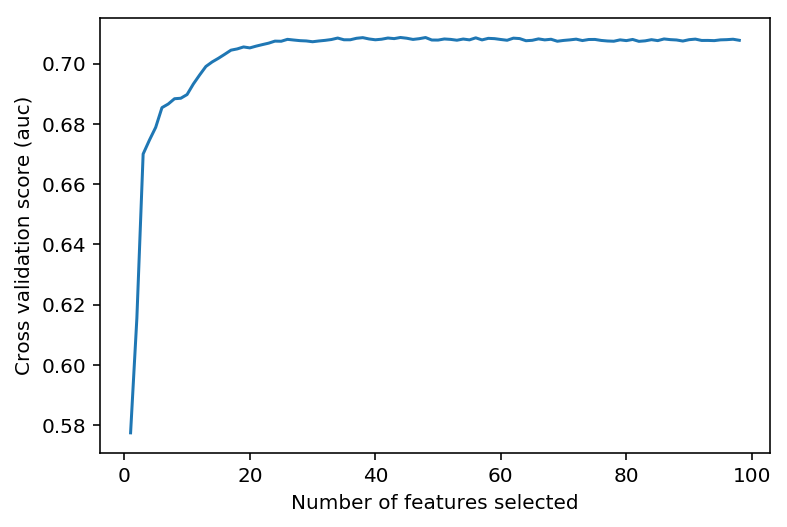

IndexError: boolean index did not match indexed array along dimension 0; dimension is 100 but corresponding boolean dimension is 98

In [8]:
# RFECV feature selection method

import warnings
warnings.filterwarnings("ignore")

# this is code for the LogisticRegression classifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFECV


# Create the RFE object and compute a cross-validated score.
names = [
#          'XGBoost',
#          'GBDT',
#          'LogisticRegression',
         'RandomForest',
        ]

classifiers = [
#                XGBClassifier(max_depth=10, learning_rate=0.05, n_estimators=200, random_state=100),
#                GradientBoostingClassifier(learning_rate=0.05, max_depth=10, n_estimators=200, max_features = 0.3, random_state=100),
#                LogisticRegression(n_jobs = -1),
               RandomForestClassifier(max_depth=10, n_estimators=200, max_features=0.3, random_state=100)
              ]

best_features = {}

for (name, clf) in zip(names, classifiers):
    
    rfecv = RFECV(estimator=clf, step=1, cv=3,
                  scoring='roc_auc', n_jobs = -1, verbose=1)
    rfecv.fit(X_train, y_train)

    print(name + " - " + "Optimal number of features : %d" % rfecv.n_features_)

    # Plot number of features VS. cross-validation scores
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("Cross validation score (auc)")
    plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
    plt.show()
    best_features[name] = list(features[rfecv.support_])

In [ ]:
best_features['RandomForest']

### Best features subsets

In [25]:
# Wrapper method LogisticRegression best subsets

lg_Index = [1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   17,
   19,
   20,
   22,
   23,
   24,
   25,
   33,
   38,
   39,
   40,
   43,
   53,
   54,
   55,
   56,
   57,
   58,
   59,
   61,
   63,
   64,
   66,
   67,
   71,
   73,
   74,
   75,
   76,
   81,
   83,
   88,
   89,
   90,
   93]

In [26]:
lg = features[lg_Index]
lg

Index(['Ambience_classy', 'Ambience_divey', 'Ambience_hipster',
       'Ambience_intimate', 'Ambience_romantic', 'Ambience_touristy',
       'Ambience_trendy', 'Ambience_upscale', 'BikeParking',
       'AcceptsCreditCards', 'Parking_garage', 'Parking_street',
       'Parking_valet', 'Parking_validated', 'Caters',
       'DietaryRestrictions_vegan', 'GoodForKids', 'GoodForBreakfast',
       'GoodForBrunch', 'GoodForLatenight', 'Video', 'Noisy', 'Outdoor',
       'Delivery', 'Group', 'Price', 'Reservation', 'TakeOut', 'review_count',
       'Breakfast', 'Lunch', 'Dinner', 'Mondayophour', 'Wednesdayophour',
       'Thursdayophour', 'Saturdayophour', 'Sundayophour',
       'Alcohol_beer_and_wine', 'Alcohol_none', 'Attire_dressy',
       'Attire_formal', 'Smoking_no', 'Wifi_free'],
      dtype='object')

In [27]:
# Wrapper method random forest best subsets

rf1 = ['Ambience_hipster', 'Ambience_trendy', 'AcceptsCreditCards',
       'Parking_garage', 'Parking_street', 'Parking_valet', 'Caters',
       'GoodForKids', 'HasTV', 'Noisy', 'Outdoor', 'Delivery', 'Group',
       'Price', 'Reservation', 'review_count', 'Breakfast', 'Brunch', 'Lunch',
       'Earlynight', 'Fridayophour', 'Mondayophour', 'Sundayophour',
       'Alcohol_full_bar', 'Alcohol_none', 'Wifi_free']

In [28]:
# RFECV method random forest best subsets
rf2 = ['Ambience_casual',
 'Ambience_hipster',
 'Ambience_trendy',
 'BestNights_friday',
 'BikeParking',
 'AcceptsCreditCards',
 'Parking_garage',
 'Parking_lot',
 'Parking_street',
 'Caters',
 'DietaryRestrictions_gluten-free',
 'DietaryRestrictions_vegan',
 'DriveThru',
 'GoodForKids',
 'GoodForDinner',
 'GoodForLunch',
 'HasTV',
 'Noisy',
 'Outdoor',
 'Delivery',
 'Price',
 'Reservation',
 'TableService',
 'TakeOut',
 'review_count',
 'Breakfast',
 'Brunch',
 'Earlynight',
 'Fridayophour',
 'Mondayophour',
 'Tuesdayophour',
 'Wednesdayophour',
 'Thursdayophour',
 'Saturdayophour',
 'Sundayophour',
 'Alcohol_full_bar',
 'Alcohol_none',
 'Smoking_no',
 'Wifi_free',
 'Wifi_no']

In [12]:
print(len(lg), len(rf1), len(rf2))

43 26 40
